In [7]:
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv('/Users/Sri Vardhani/Dropbox/My PC (LAPTOP-9UMDJPSR)/Downloads/New_DataBackOrders.csv')

In [4]:
df=df.drop(columns=['Unnamed: 0'])#Deleting the column not required for decision tree

In [5]:
df=df.drop(index=(pd.Series(df['national_inv'].loc[df['national_inv']<0])).index) 
#national iventory whose values are less than 0 as they aren't required

Text(0.5, 1.0, 'Box plot of in_transit_qty')

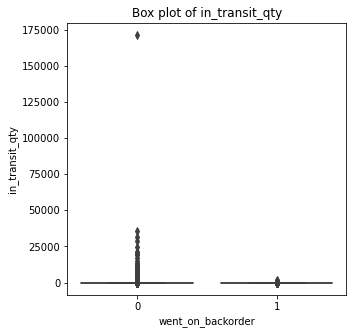

In [8]:
plt.figure(figsize=(5,5)) 
sn.boxplot(x='went_on_backorder',y='in_transit_qty', data=df).set_title('Box plot of in_transit_qty')

Text(0.5, 1.0, 'Box plot of in_transit_qty from 0 to 90th percentile')

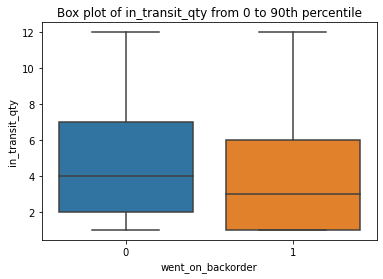

In [10]:
sn.boxplot(x='went_on_backorder',y='in_transit_qty', data=df[(df.in_transit_qty < df.in_transit_qty.quantile(0.90))  & (df.in_transit_qty > df.in_transit_qty.quantile(0))]).set_title('Box plot of in_transit_qty from 0 to 90th percentile')

In [76]:
y=df['went_on_backorder']

In [77]:
df=df.drop(columns=['went_on_backorder'])

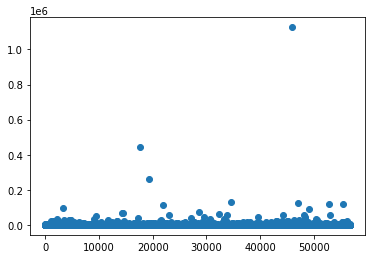

In [78]:
plt.scatter(df.index,df['forecast_3_month']) 

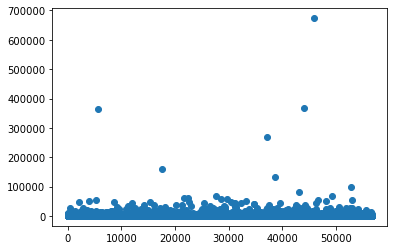

In [79]:
plt.scatter(df.index,df['national_inv']) 

In [80]:
from sklearn.preprocessing import Normalizer
normal=Normalizer()

In [81]:
df=normal.fit_transform(df)

In [82]:
np.shape(df)

(56276, 21)

In [83]:
df[0]

array([0.94107445, 0.26887842, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.0672196 , 0.03764298,
       0.        , 0.13443921, 0.        , 0.        , 0.13443921,
       0.        ])

In [84]:
X=df

In [85]:
y=np.array(y)

In [86]:
from sklearn import tree
model=tree.DecisionTreeClassifier()

In [87]:
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [88]:
y_pred=model.predict(X_test)

In [89]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9010590660317009